In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
inmuebles_bogota_bd = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/inmuebles_bogota.csv')

In [3]:
inmuebles_bogota_bd.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


La base de datos cuenta con los siguientes datos: tipo, descripción, número de habitaciones, número de baños, área (m2), barrio, UPZ y valor del inmueble.

In [4]:
inmuebles_bogota_bd.shape

(9520, 8)

Contamos con un total de 9 528 de filas (apartamentos) y 8 columnas (tipo de información de cada apartamento).

In [6]:
inmuebles_bogota_bd.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

Observamos el título de cada columna y nos encontramos con la columna "Baños" y "Área", que pueden traer conflictos por el tipo de codificación.

In [57]:
inmuebles_bogota_columnas = {'Baños' : 'Banos', 'Área' : 'Area'}
inmuebles_bogota_bd = inmuebles_bogota_bd.rename(columns = inmuebles_bogota_columnas)
inmuebles_bogota_bd.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
8065,Casa,Casa en venta en Costa Azul,4,3,120,Costa Azul,Suba,$ 285.000.000
5559,Apartamento,Apartamento en venta en Usaquén,3,2,88,Usaquén,Usaquén,$ 408.000.000
2947,Apartamento,Apartamento en venta en Bosa,3,2,62,Bosa,Bosa Central,$ 153.500.000
2235,Apartamento,Apartamento en venta en Barrios Unidos,3,2,68,Barrios Unidos,Los Andes,$ 145.000.000
5500,Casa,Casa en venta en Kennedy,2,1,43,Kennedy,Kennedy Central,$ 116.000.000


Realizamos el cambio de nombre de la columna "Baños" por "Banos" y de "Área" por "Area" para facilitar el análisis.

In [10]:
inmuebles_bogota_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


Analizamos nuestra base de datos:
- Contamos con un total de 9520 entradas.
- Las columnas "Tipo", "Descripcion", "Habitaciones", "Banos", "Area", "Barrio" y "Valor" no contienen valores nulos; mientras que la columna "UPZ" presenta 42 valores nulos.
- Las columnas "Tipo", "Descripcion", "Barrio", "UPZ" y "Valor" son de tipo texto; mientras que las columnas "Habitaciones", "Banos", "Area" son de tipo entero.

In [11]:
inmuebles_bogota_bd.iloc[300]

Tipo                                Apartamento
Descripcion     Apartamento en venta en Kennedy
Habitaciones                                  2
Banos                                         1
Area                                         42
Barrio                                  Kennedy
UPZ                             Kennedy Central
Valor                             $ 116.100.000
Name: 300, dtype: object

Analizamos los datos del índice 300.

In [16]:
round(inmuebles_bogota_bd.Area.mean(),2)

146.66

Nuestra base de datos registra inmuebles con un área media de 146.66 m2

In [17]:
sum(inmuebles_bogota_bd.Barrio == "Chico Reservado")

225

Observamos que los inmuebles que encontramos en el barrio "Chico Reservado" suman un total de 225.

In [18]:
barrio_ChicoReservado = inmuebles_bogota_bd[inmuebles_bogota_bd.Barrio == "Chico Reservado"]
barrio_ChicoReservado.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
3126,Apartamento,Apartamento en venta en Chico Reservado,1,2,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 560.000.000
5944,Apartamento,Apartamento en venta en Chico Reservado,2,2,109,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 499.000.000
7608,Apartamento,Apartamento en venta en Chico Reservado,2,2,108,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 780.000.000
5936,Apartamento,Apartamento en venta en Chico Reservado,3,4,118,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 680.000.000
4896,Apartamento,Apartamento en venta en Chico Reservado,3,4,192,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000


Creamos un nuevo dataframe a partir de los inmuebles que se encuentran en el barrio "Chico Reservado".

In [20]:
round(barrio_ChicoReservado.Area.mean(),2)

142.79

Los inmuebles pertenecientes al barrio "Chico Reservado" cuentan con un área media de 142.79 m2.

In [21]:
len(inmuebles_bogota_bd.Barrio.value_counts())

149

Nuestra base de datos cuenta con un total de 149 barrios.

In [22]:
inmuebles_bogota_bd.Barrio.value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

El barrio "Usaquén" alberga la mayor cantidad de inmuebles.

<Axes: title={'center': 'Número de inmuebles registrados por barrio'}, xlabel='Barrio', ylabel='Nro inmuebles'>

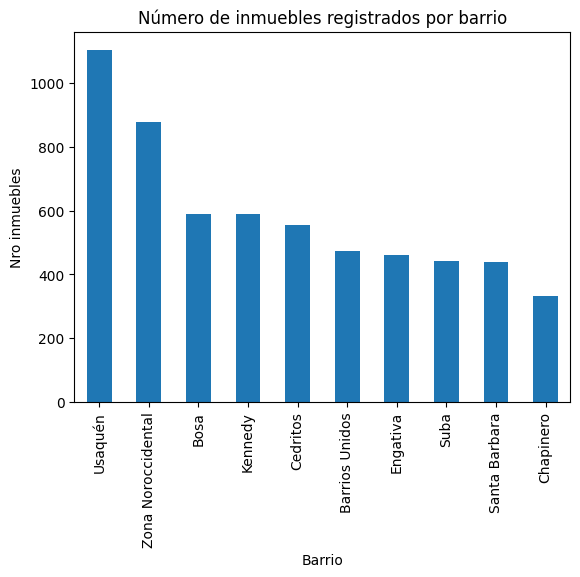

In [40]:
inmuebles_bogota_barrio = inmuebles_bogota_bd.Barrio.value_counts()
inmuebles_bogota_barrio.head(10).plot.bar(title = "Número de inmuebles registrados por barrio", xlabel = "Barrio", ylabel = "Nro inmuebles")

In [70]:
inmuebles_bogota_bd.groupby("Barrio")["Area"].mean().sort_values(ascending=False).head(10)

Barrio
Modelia                  4316.750000
Libertador                642.000000
Bosa Piamonte             400.000000
La Soledad                378.625000
Restrepo                  336.500000
Santa Librada             328.000000
Las Ferias                320.000000
Santa Ana                 309.375000
Veraguas                  302.666667
Bellavista Occidental     286.200000
Name: Area, dtype: float64

Se muestran los 10 barrios que cuentan con inmuebles con la mayor área promedio.

In [71]:
inmuebles_bogota_bd.describe()

,Habitaciones,Banos,Area
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


Respecto a todos nuestros datos sobre inmuebles en Bogotá, observamos que en promedio estos cuentan con 3 habitaciones, 2 baños y un área de 146 m2. Así mismo, el número mínimo de habitaciones es 1, de baños es 0 y de área es 2 m2; mientras que el número máximo de habitaciones por inmueble es 110, de baños es 9 y área es 166 243 m2.